# Exercises for Pandas


In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
#Amazon fires data

url="https://product2.s3-ap-southeast-2.amazonaws.com/Activity_files/MC_DAP01/Brazilian-fire-dataset.csv"


amazondf=pd.read_csv(url)

In [4]:
#Quick look at the data

amazondf.tail()

,Year,State,Month,Number of Fires,Date Reported
6449,2012,Tocantins,December,128.0,1/01/2012
6450,2013,Tocantins,December,85.0,1/01/2013
6451,2014,Tocantins,December,223.0,1/01/2014
6452,2015,Tocantins,December,373.0,1/01/2015
6453,2016,Tocantins,December,119.0,1/01/2016


## Exercise 1

Find which state has recorded the maximum number of fires on any given day (not the total sum), and in which month did it occur?

In [14]:
amazondf[amazondf['Number of Fires']==amazondf['Number of Fires'].max()][['State','Month']]

,State,Month
888,Amazonas,September


In [11]:
amazondf['Number of Fires'].max()

998.0

In [12]:
amazondf['Number of Fires']==amazondf['Number of Fires'].max()

0       False
1       False
2       False
3       False
4       False
        ...  
6449    False
6450    False
6451    False
6452    False
6453    False
Name: Number of Fires, Length: 6454, dtype: bool

In [13]:
amazondf[amazondf['Number of Fires']==amazondf['Number of Fires'].max()]

,Year,State,Month,Number of Fires,Date Reported
888,2008,Amazonas,September,998.0,1/01/2008


In [15]:
df2=amazondf[amazondf['Number of Fires']==amazondf['Number of Fires'].max()][['State','Month']]

In [17]:
df2['State'][888]

'Amazonas'

## Exercise 2

1. Calculate the total number of fires for the entire duration (i.e. for 1998 to 2018) for every state
2. Display the DataFrame and verify that results looks OK (i.e. GroupBy and Aggregation has been calcuated correctly)
3. Print the Summary Statistics - and what is the Minimum and Maximum number of total fires records?
4. Which state has recorded minimum number of Total Fires, and which state has recorded maximum number of Total Fires?

In [24]:
amazondf.groupby('State')['Number of Fires'].sum().reset_index()

,State,Number of Fires
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapá,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceará,30428.063
6,Distrito Federal,3561.000
7,Espírito Santo,6546.000
8,Goiás,37695.520
9,Maranhão,25129.131


In [21]:
amazondf.groupby('State')['Number of Fires'].count().describe()

count     27.000000
mean     239.037037
std        0.192450
min      239.000000
25%      239.000000
50%      239.000000
75%      239.000000
max      240.000000
Name: Number of Fires, dtype: float64

In [22]:
amazondf.groupby('State')['Number of Fires'].sum().idxmax()

'São Paulo'

In [23]:
amazondf.groupby('State')['Number of Fires'].sum().idxmin()

'Sergipe'

## Exercise 3 

Plot the Graph showing the Total Number of Fires for every State. Add labels for the number of fires.

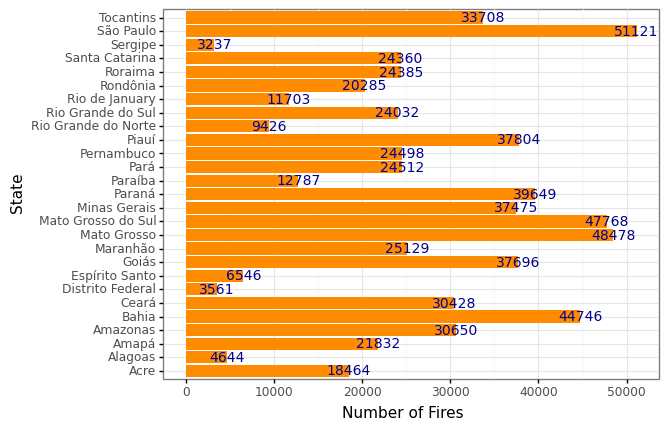

<ggplot: (8770479305283)>

In [59]:
plotframe=amazondf.groupby('State')['Number of Fires'].sum().reset_index()

(ggplot(data=plotframe, mapping=aes(x="State", y="Number of Fires"))+
geom_bar(stat='identity', fill='darkorange')+
geom_text(mapping=aes(label="Number of Fires"),
              format_string='{:.0f}',
          size=10, color='darkblue', va='center')+
coord_flip()+
theme_bw())

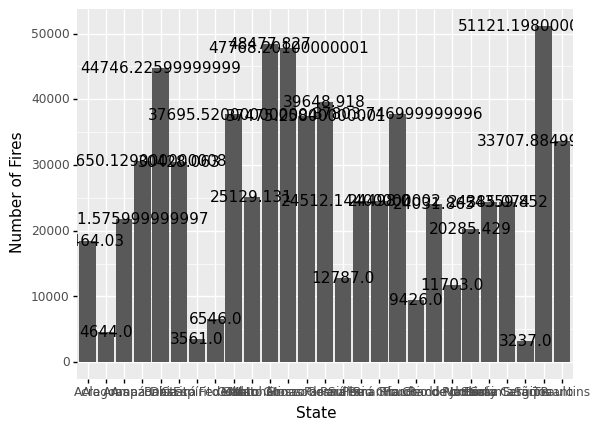

<ggplot: (8770440896672)>

In [62]:
plotframe=amazondf.groupby('State')['Number of Fires'].sum().reset_index()

(ggplot(data=plotframe, mapping=aes(x="State", y="Number of Fires"))+
geom_bar(stat='identity')+
geom_text(mapping=aes(label="Number of Fires")))